In [ ]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")
Eoff=2.0
Ts=collect(300.0:50.0:900.0)
#xs=collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)
x=0.6#0.6
xs=[x]
var0=[Ts[1],x]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

bandX3=parBandTx(effMassX3(var0),0.0,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),0.0,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)
#bndstTx=BandStrucTx([bandX3,,bandX3,bandX3,],var0)


effMassesX1=Array{Float64}(length(xs),length(Ts))
effMassesX3=Array{Float64}(length(xs),length(Ts))

EX1s=Array{Float64}(length(xs),length(Ts))
EX3s=Array{Float64}(length(xs),length(Ts))

NII=1e12*1e6
vartau0=[bandX3.effMass,Ts[1],1.0,x,1.5,bandX3,NII,bndstTx]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, var[6]:band, 
#var[7]:NII var[8]:bndst
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],var[3]
,opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauII(var)=tauII_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3]
,tauPOPIIint(var[5],var[2],var[4],var[6]))

tauTOTTx=tau_electron_B([tauAC,tauPOP2,tauII2],vartau0)#tauAC,tauII2,tauPOP2
#tauTOTTx=tau_electron_B([tauAC],vartau0)

numofn=[-3e19,-1.2e20,-1.75e20,-0.9e20]#-1.2e20,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
Efxs=collect(0.0:0.01:3.0)
eqvaluem=Array{Float64}(length(Ts),length(Efxs))
EfcalcM=Array{Float64}(length(Ts))
eqvalue=Array{Float64}(length(Ts))
eqvalue=Array{Float64}(length(Ts))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))
numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutnp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutTOT=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))
taugetTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))
bandX3out=Array{Float64}(length(Es),length(Ts),length(numofn))
bandX1out=Array{Float64}(length(Es),length(Ts),length(numofn))
bandLHout=Array{Float64}(length(Es),length(Ts),length(numofn))
bandHHout=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDX1out=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDX3out=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaDLHout=Array{Float64}(length(Es),length(Ts),length(numofn))
sigmaX3out=Array{Float64}(length(Ts),length(numofn))
sigmaLHout=Array{Float64}(length(Ts),length(numofn))
sigmabandsout=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
seebeckbandsout=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
xSn=x
##Mg2Si Nv=1 tau(AC,POP2,II2) N-=8e19 
#Efinput=[0.1751,0.17395,0.1725,0.1708,0.16885,0.16665,0.1642,0.1615,0.15855,0.15535,0.15185,0.14815,0.1442]
##
##Mg2Si Nv=2 tau(AC,POP2,II2) N-=6e19 
#Efinput=[0.107,0.1048,0.10225,0.0993,0.09595,0.0922,0.0881,0.0836,0.0788,0.0736,0.06815,0.06235,0.05625]
##
##Mg2Si Nv=3 tau(AC,POP2,II2) N-=6e19 
#Efinput=[0.07835,0.07535,0.07185,0.0679,0.06345,0.0585,0.05315,0.0474,0.04125,0.03475,0.0279,0.02065,0.01315]
##

##Mg2Si Nv=1 tau(AC,POP2,II2) N-=6e19 
##Efinput=[0.14335,0.14175,0.1399,0.13775,0.1353,0.13255,0.12945,0.1261,0.12245,0.11845,0.11425,0.1097,0.10495]
##
##Mg2Si Nv=1 tau(AC,POP2,II2) N-=3e19
#Efinput=[0.08605,0.0833,0.0801,0.0764,0.0723,0.06775,0.06275,0.0574,0.05165,0.04555,0.0391,0.0323,0.0252]
##
##Mg2Si Nv=2 tau(AC,POP2,II2) N-=3e19
#Efinput=[0.04685,0.04235,0.0372,0.03145,0.02515,0.0183,0.01095,0.000315,-0.000505,-0.00137,-0.0227,-0.0321,-0.04185]
##
##Mg2Sn Nv 1 N-=3e19
##Efinput=[0.08605,0.0833,0.0801,0.07645,0.0723,0.06775,0.0628, 0.0574,0.05165,0.04555, 0.0391, 0.0323, 0.0252]
##
##@time (sigmas,seebecks)=sigmaArray(bndstTx,Ts,numofn,tauTOTTx,xmax)

In [2]:
@time (sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)

 47.007256 seconds (451.24 M allocations: 56.806 GB, 9.37% gc time)


(
13x4x1 Array{Float64,3}:
[:, :, 1] =
 2.02028  2.07883  2.09966  2.06472
 2.01151  2.07369  2.09536  2.0589 
 2.00169  2.06787  2.09045  2.05232
 1.9909   2.06138  2.08494  2.04503
 1.97927  2.05425  2.07886  2.03705
 1.967    2.04652  2.07221  2.02842
 1.95459  2.03822  2.06504  2.01922
 1.94301  2.02946  2.05738  2.00962
 1.93363  2.0204   2.04934  1.99988
 1.92759  2.01134  2.04105  1.99049
 1.92506  2.00275  2.03278  1.98212
 1.92547  1.99517  2.02487  1.97544
 1.92802  1.98916  2.01775  1.97091,

13x4x1 Array{Float64,3}:
[:, :, 1] =
 50526.3      1.67596e5      2.2791e5       1.30839e5
 42773.7      1.44054e5      1.99667e5      1.14035e5
 37495.5      1.27085e5      1.76251e5  99995.9      
 32960.3      1.12599e5      1.55944e5  88489.6      
 29135.0      1.00721e5      1.37217e5  78598.3      
 25803.1  90198.4            1.2368e5   69717.5      
 23052.9  81121.1            1.12042e5  61836.6      
 21638.9  73103.3            1.01817e5  55490.0      
 21438.9  66413.0     

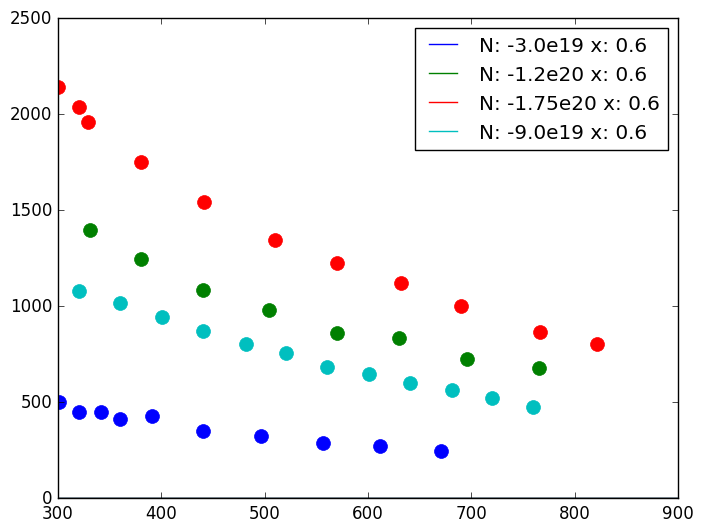

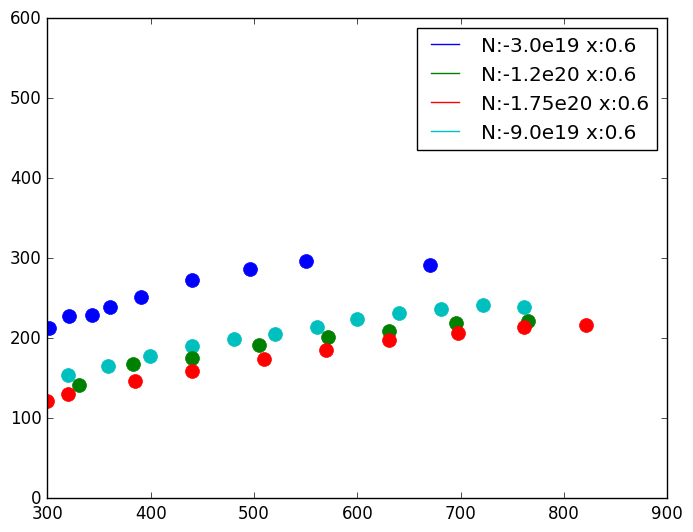

PyObject <matplotlib.legend.Legend object at 0x7fae10fbc630>

In [3]:
colors=["b","g","r","c","m","y","k"]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        k+=1
        #push!(plots,p)       
    end
end
plot(ZMg2SiSn06S1TE,ZMg2SiSn06S1E, linestyle="None",marker=".",markersize=20,color="b")
plot(ZMg2SiSn06S2TE,ZMg2SiSn06S2E, linestyle="None",marker=".",markersize=20,color="c")
#plot(ASSimMg2SiT,ASSimMg2SiTE, linestyle="--",marker="None")
plot(ZMg2SiSn06S3TE,ZMg2SiSn06S3E, linestyle="None",marker=".",markersize=20,color="g")
plot(ZMg2SiSn06Sb075TE,ZMg2SiSn06Sb075E, linestyle="None",marker=".",markersize=20,color="r")
#plot(TKMg2Sn1T,TKMg2Sn1S, linestyle="None",marker=".",markersize=20)
ylim(0,2500)
legend()
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)
        plot(Ts,-1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    end
end
plot(ZMg2SiSn06S1TS,ZMg2SiSn06S1S, linestyle="None",marker=".",markersize=20,color="b")
plot(ZMg2SiSn06S2TS,ZMg2SiSn06S2S, linestyle="None",marker=".",markersize=20,color="c")
#plot(ASSimMg2SiT,ASSimMg2SiTS*-1, linestyle="--",marker="None")
plot(ZMg2SiSn06S3TS,ZMg2SiSn06S3S, linestyle="None",marker=".",markersize=20,color="g")
plot(ZMg2SiSn06Sb075TS,ZMg2SiSn06Sb075S, linestyle="None",marker=".",markersize=20,color="r")
#plot(TKMg2Sn1TS,TKMg2Sn1Se, linestyle="None",marker=".",markersize=20)
ylim(0,600)
legend()